# Hyperspectral Image Analysis 

Reference: https://towardsdatascience.com/hyperspectral-image-analysis-getting-started-74758c12f2e9

## Download HSI Data

In [2]:
!wget http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat

--2021-01-15 06:15:10--  http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34806917 (33M)
Saving to: ‘PaviaU.mat’

PaviaU.mat           30%[=====>              ]  10.27M   840KB/s    in 14s     

2021-01-15 06:15:24 (769 KB/s) - Connection closed at byte 10768523. Retrying.

--2021-01-15 06:15:25--  (try: 2)  http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 34806917 (33M), 24038394 (23M) remaining
Saving to: ‘PaviaU.mat’

PaviaU.mat           61%[++++++=====>        ]  20.54M   856KB/s    in 13s     

2021-01-15 06:15:39 (807 KB/s) - Connection closed at byte 21535511. Retrying.

--2021-01-15 06:15:41--  (try: 3)  http://www.ehu.eus/ccwintco/uploads/e

In [3]:
!ls

PaviaU_gt.mat  PaviaU.mat  sample_data


## Read the Data

In [21]:
from scipy.io import loadmat


def read_HSI():
  X = loadmat('PaviaU.mat')['paviaU']
  y = loadmat('PaviaU_gt.mat')['paviaU_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (610, 340, 103)
y shape: (610, 340)


In [22]:
X

array([[[ 647,  499,  464, ..., 3221, 3238, 3250],
        [ 604,  546,  527, ..., 2442, 2464, 2528],
        [ 621,  746,  556, ..., 2308, 2345, 2361],
        ...,
        [ 524,  525,  598, ..., 2936, 2940, 2950],
        [ 528,  330,   70, ..., 2737, 2774, 2829],
        [ 711,  483,  423, ..., 2562, 2539, 2488]],

       [[ 705,  681,  668, ..., 2607, 2607, 2609],
        [ 891,  692,  453, ..., 1581, 1561, 1522],
        [ 547,  511,  604, ..., 1535, 1531, 1538],
        ...,
        [1149,  658,  434, ..., 3247, 3251, 3277],
        [ 917, 1004,  743, ..., 2828, 2806, 2808],
        [1037,  849,  547, ..., 2491, 2527, 2522]],

       [[1084,  875,  706, ..., 2108, 2167, 2183],
        [ 335,  517,  611, ..., 1105, 1109, 1095],
        [1042,  683,  318, ...,  806,  791,  814],
        ...,
        [ 799,  693,  481, ..., 2761, 2791, 2842],
        [ 226,  350,  613, ..., 2885, 2879, 2859],
        [ 828,  571,  479, ..., 2799, 2809, 2806]],

       ...,

       [[ 733,  617,  70

In [23]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0]], dtype=uint8)

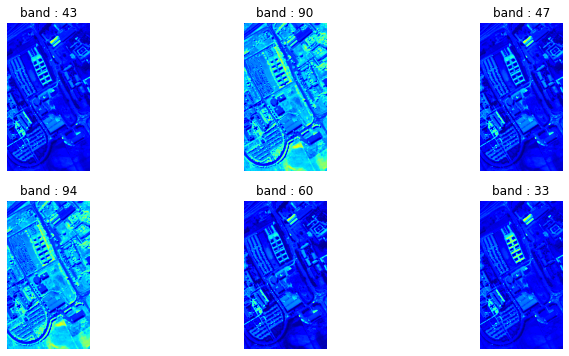

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

sns.axes_style('whitegrid') #darkgrid
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='jet')
    plt.axis('off')
    plt.title(f'band : {q}')

In [27]:
# Visualizing the Ground truth of the HSI

cls = px.imshow(y, color_continuous_scale='jet',)
                
cls.update_layout(title = 'Gound Trurh', coloraxis_showscale=False)
cls.update_xaxes(showticklabels=False)
cls.update_yaxes(showticklabels=False)
cls.show()
# py.plot(cls, filename = 'ground_truth', auto_open=True)

## Convert the dataset into csv 

In [28]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df
  
df = extract_pixels(X, y)


In [29]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band65,band66,band67,band68,band69,band70,band71,band72,band73,band74,band75,band76,band77,band78,band79,band80,band81,band82,band83,band84,band85,band86,band87,band88,band89,band90,band91,band92,band93,band94,band95,band96,band97,band98,band99,band100,band101,band102,band103,class
0,647,499,464,371,291,319,365,322,296,305,277,219,219,222,201,162,157,183,204,194,198,216,249,284,294,322,338,342,336,342,362,365,348,341,324,316,293,274,251,244,...,192,227,287,376,493,633,763,913,1149,1442,1759,2102,2425,2689,2895,3058,3196,3252,3195,3297,3542,3550,3537,3545,3514,3477,3468,3433,3408,3420,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,604,546,527,455,378,377,336,314,324,329,328,326,275,215,197,217,239,258,246,233,241,261,279,300,329,344,341,362,362,367,368,359,345,344,327,302,281,271,270,261,...,152,190,242,301,391,505,633,774,960,1191,1454,1737,2001,2209,2363,2484,2594,2613,2541,2588,2821,2839,2738,2690,2678,2673,2712,2725,2657,2605,2583,2538,2509,2511,2501,2468,2442,2464,2528,0
2,621,746,556,360,285,300,274,276,332,319,278,255,232,207,210,209,168,139,137,154,168,202,225,231,244,257,263,262,266,276,285,291,285,272,271,241,208,194,179,157,...,116,153,188,243,322,413,492,591,737,933,1125,1327,1519,1666,1790,1934,2029,2034,2010,2069,2191,2233,2245,2249,2255,2250,2249,2239,2239,2282,2288,2242,2193,2202,2225,2266,2308,2345,2361,0
3,637,592,482,556,508,284,178,198,193,224,217,215,187,161,152,136,124,122,127,126,125,123,147,188,208,203,202,206,219,235,238,227,217,215,216,201,190,167,149,162,...,129,174,245,338,455,585,720,850,1013,1225,1460,1702,1938,2157,2317,2433,2525,2552,2493,2554,2733,2781,2748,2748,2737,2710,2681,2642,2645,2684,2675,2609,2541,2551,2571,2569,2573,2620,2644,0
4,625,560,480,360,377,341,264,208,231,266,207,154,123,95,106,102,101,123,154,170,191,210,216,256,289,325,348,357,361,362,363,370,386,369,344,331,312,308,288,263,...,173,220,292,382,488,592,692,834,1032,1236,1461,1698,1876,2007,2118,2213,2288,2267,2192,2274,2448,2454,2387,2388,2441,2435,2454,2457,2430,2423,2392,2344,2289,2328,2415,2424,2386,2431,2456,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207400 entries, 0 to 207399
Columns: 104 entries, band1 to class
dtypes: uint16(103), uint8(1)
memory usage: 40.9 MB


In [31]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band64,band65,band66,band67,band68,band69,band70,band71,band72,band73,band74,band75,band76,band77,band78,band79,band80,band81,band82,band83,band84,band85,band86,band87,band88,band89,band90,band91,band92,band93,band94,band95,band96,band97,band98,band99,band100,band101,band102,band103
count,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.00000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,...,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000
mean,925.324995,850.237584,800.363558,809.889783,830.085950,834.162700,833.530641,825.932729,823.827637,830.388689,838.761900,833.532261,833.957903,840.022734,846.49027,849.024166,858.274605,869.041553,879.729687,893.426895,909.047888,929.773245,950.449826,971.719296,999.330747,1030.487247,1047.342570,1056.144036,1064.008298,1078.164397,1094.337912,1102.542194,1106.111823,1112.674807,1116.410511,1117.368182,1116.463134,1115.816958,1115.709667,1116.513134,...,1151.786355,1167.364634,1196.965762,1242.671355,1300.318158,1374.747102,1451.015511,1524.074653,1596.037252,1671.897768,1753.491707,1835.790125,1922.294619,1996.554687,2063.378761,2114.096861,2155.272912,2194.415844,2216.565135,2212.345323,2193.142758,2210.446374,2232.427758,2245.315858,2245.806716,2246.235497,2253.048669,2267.367917,2265.880313,2257.890217,2262.503269,2266.693293,2257.763443,2249.329595,2246.216779,2238.254364,2231.822647,2224.744884,2236.901707,2253.451692
std,444.427499,468.464292,493.590158,527.235307,555.419089,574.543548,592.474167,605.782075,619.492506,636.532214,654.150867,663.504620,675.055950,685.877447,694.17722,700.069128,706.904269,710.988908,712.225631,712.766144,711.116605,707.754548,702.056494,696.329369,694.323524,695.658318,691.457118,685.112863,680.143249,679.484331,680.548766,678.991678,678.109958,681.818279,686.403595,691.668118,696.466303,700.002590,701.182840,700.248079,...,736.586216,724.016756,708.647458,695.452171,674.953291,653.314752,632.543791,615.486140,603.333136,597.054264,605.347893,629.388781,667.016967,708.788296,750.020598,785.134096,814.465202,840.078731,856.606082,852.494726,820.735878,830.340437,856.128856,869.604098,871.258687,870.414926,870.642830,872.611679,868.905723,863.646853,863.285910,863.351557,857.286520,845.571285,833.001117,826.922155,827.403828,827.257369,834.092348,844.165146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,26.000000,37.000000,41.000000,59.000000,71.000000,72.0000

## Dimensionality reduction Using Principal Component Analysis(PCA)

The dimensions of the data is reduced from 103 to 3 as it makes easier to understands patterns in the data.

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,4)]+['class']

In [51]:
q.head()

,PC-1,PC-2,PC-3,class
0,-5150.190044,6795.052770,1532.351461,0
1,-6082.245760,3158.592195,1463.194744,0
2,-7214.505405,1158.875812,1400.817899,0
3,-6566.279360,3398.894763,1126.024772,0
4,-6496.967970,2154.797771,1035.954575,0


In [53]:
# saving to .csv
q.to_csv('paviaU_3.csv', index=False)

Removing class - 0 as it is not need.

In [54]:
qq = q[q['class'] != 0]

In [55]:
qq['class'].value_counts()

2    18649
1     6631
6     5029
8     3682
4     3064
3     2099
5     1345
7     1330
9      947
Name: class, dtype: int64

In [56]:
class_labels = {'1': 'Asphalt'	,
'2'	:'Meadows'	,
'3'	:'Gravel'	,
'4'	:'Trees'	,
'5'	:'Painted metal sheets'	,
'6'	: 'Bare Soil'	,
'7'	:'Bitumen'	,
'8'	:'Self Blocking Bricks'	,
'9'	:'Shadows'}

Adding new column to the dataframe which contains the class names w.r.t class nummber.

In [57]:
qq['label'] =  qq['class'].apply(lambda x : class_labels[str(x)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
qq['label'].value_counts()

Meadows                 18649
Asphalt                  6631
Bare Soil                5029
Self Blocking Bricks     3682
Trees                    3064
Gravel                   2099
Painted metal sheets     1345
Bitumen                  1330
Shadows                   947
Name: label, dtype: int64

In [59]:
qq.head()

,PC-1,PC-2,PC-3,class,label
91,4894.139640,-3430.386762,-873.195311,1,Asphalt
92,3125.663208,-6615.473932,1122.107496,1,Asphalt
93,-1538.206534,-5943.101140,1388.775323,1,Asphalt
94,780.787410,-1051.450839,-815.558091,1,Asphalt
95,9148.499570,-4150.656217,-1987.224082,1,Asphalt


## Visualising the Data

In [60]:
count = qq['class'].value_counts()
bar_fig = px.bar(x = count.index[1:], y = count[1:], labels= class_labels, color = count.index[1:] )
bar_fig.update_layout(
    xaxis = dict(
        title='Class',
        tickmode = 'array',
        tickvals = count.index[1:].tolist(),
        
        tickangle = 45
    ),
    yaxis = dict(
        title='count',
      ),
      showlegend=False
)
bar_fig.show()

## It is hard to visualize the entire data. So, sampling the data makes the task easier.

In [63]:
# sampling dataset
sample_size = 200
sample = qq.groupby('class').apply(lambda x: x.sample(sample_size))
sample.head()

PC-1         PC-2         PC-3  class    label
class                                                              
1     59006   3486.809214 -2465.674401 -1443.963441      1  Asphalt
      4861   -1075.207742 -6689.292154  1817.411564      1  Asphalt
      65134   5095.089698 -5984.738627  1654.793802      1  Asphalt
      196563 -1860.386819 -5458.242569   351.670263      1  Asphalt
      194175 -1203.306571 -5322.530345   477.718330      1  Asphalt

# 3D Scatter Plot

In [71]:
scatter_3d = px.scatter_3d(sample, x="PC-1", y="PC-2", z="PC-3", color="label", size="class", hover_name="label",
                  symbol="label")#, color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
scatter_3d.show()                
#py.plot(scatter_3d, filename = 'scatter_3d', auto_open=True)

## Area Plot w.r.t principal components

In [72]:
area_plt1 = px.area(sample, x="PC-1", y="PC-2", color="label", line_group="label")
area_plt1.show()
#py.plot(area_plt1, filename = 'area_plt1', auto_open=True)

In [73]:
area_plt2 = px.area(sample, x="PC-1", y="PC-3", color="label", line_group="label")
area_plt2.show()
#py.plot(area_plt2, filename = 'area_plt2', auto_open=True)

In [74]:
area_plt3 = px.area(sample, x="PC-2", y="PC-3", color="label", line_group="label")
area_plt3.show()
#py.plot(area_plt3, filename = 'area_plt2', auto_open=True)

## Pair Plot

In [75]:
pair = px.scatter_matrix(sample, dimensions=["PC-1", "PC-2", "PC-3"], color="label")
pair.show()
#py.plot(pair, filename = 'pair_plot_pc', auto_open=True)

## 2D scatter bubble chart 

In [76]:
fig = px.scatter(sample, x="PC-1", y="PC-2", size="class", color="label",
           hover_name="label", log_x=True, size_max=12)
fig.show()

In [77]:
# Box Plot
fig = fig = px.violin(sample, y="PC-1", x="PC-2", color="label", box=True, points="all", hover_data=['PC-1', 'PC-2', 'PC-3','label'])
fig.show()

## 3D line plot

In [79]:

line = px.line_3d(sample, x="PC-1", y="PC-2", z="PC-3", color="label", line_dash="label")
line.show()
#py.plot(line, filename = '3D_Scatter_line_Plot', auto_open=True)

In [80]:
par = px.parallel_coordinates(sample[['PC-1', 'PC-2', 'PC-3', 'class']], color="class", labels={1: 'Asphalt',
 2: 'Meadows',
 3: 'Gravel',
 4: 'Trees',
 5: 'Painted metal sheets',
 6: 'Bare Soil',
 7: 'Bitumen',
 8: 'Self Blocking Bricks',
 9: 'Shadows'}, color_continuous_scale=px.colors.sequential.Inferno, color_continuous_midpoint=2)
par.show()



---



---

